In [23]:
# KNN
#by Raghav Mangla
# 2021UCA1822

# Installing Packages
install.packages("e1071")
install.packages("caTools")
install.packages("class")

# Loading package
library(e1071)
library(caTools)
library(class)


# Classification
data <- read.csv('binary.csv')
str(data)

# Splitting data into train and test data
split <- sample.split(data, SplitRatio = 0.7)
train_cl <- subset(data, split == "TRUE")
test_cl <- subset(data, split == "FALSE")



head(train_cl)
head(test_cl)


# Fitting KNN Model to training dataset
classifier_knn <- knn(train = train_cl,
                      test = test_cl,
                      cl = train_cl$admit,
                      k = 1)
classifier_knn





Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
2,1,660,3.67,3
3,1,800,4.00,1
6,1,760,3.00,2
7,1,560,2.98,1
10,0,700,3.92,2
11,0,800,4.00,4


,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
4,1,640,3.19,4
5,0,520,2.93,4
8,0,400,3.08,2
9,1,540,3.39,3
12,0,440,3.22,1


[1] 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 [38] 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 [75] 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0
[112] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0
[149] 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0
[186] 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0
Levels: 0 1

In [24]:
# Confusiin Matrix
cm <- table(test_cl$admit, classifier_knn)
cm

   classifier_knn
      0   1
  0 139   7
  1   8  46

In [25]:
# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(classifier_knn != test_cl$admit)
print(paste('Accuracy =', 1-misClassError))

# K = 3
classifier_knn <- knn(train = train_cl,
                      test = test_cl,
                      cl = train_cl$admit,
                      k = 3)
misClassError <- mean(classifier_knn != test_cl$admit)
print(paste('Accuracy =', 1-misClassError))

# K = 5
classifier_knn <- knn(train = train_cl,
                      test = test_cl,
                      cl = train_cl$admit,
                      k = 5)
misClassError <- mean(classifier_knn != test_cl$admit)
print(paste('Accuracy =', 1-misClassError))

# K = 7
classifier_knn <- knn(train = train_cl,
                      test = test_cl,
                      cl = train_cl$admit,
                      k = 7)
misClassError <- mean(classifier_knn != test_cl$admit)
print(paste('Accuracy =', 1-misClassError))

# K = 15
classifier_knn <- knn(train = train_cl,
                      test = test_cl,
                      cl = train_cl$admit,
                      k = 15)
misClassError <- mean(classifier_knn != test_cl$admit)
print(paste('Accuracy =', 1-misClassError))

# K = 19
classifier_knn <- knn(train = train_cl,
                      test = test_cl,
                      cl = train_cl$admit,
                      k = 19)
misClassError <- mean(classifier_knn != test_cl$admit)
print(paste('Accuracy =', 1-misClassError))

[1] "Accuracy = 0.925"
[1] "Accuracy = 0.895"
[1] "Accuracy = 0.86"
[1] "Accuracy = 0.8"
[1] "Accuracy = 0.795"
[1] "Accuracy = 0.79"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



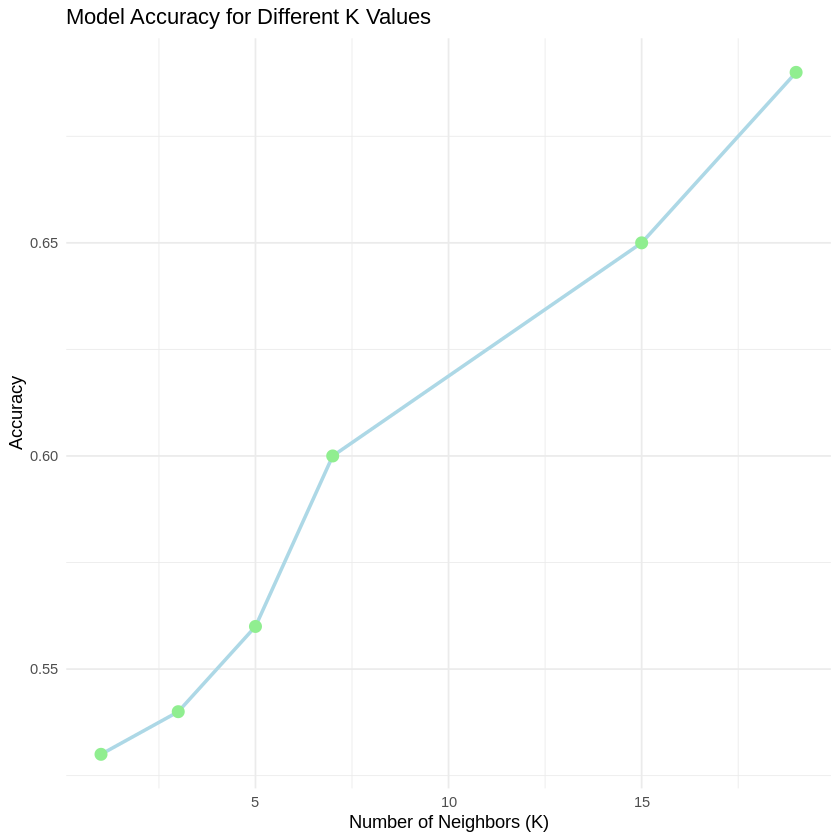

In [26]:
install.packages("ggplot2");
library(ggplot2)

# Data preparation
k_values <- c(1, 3, 5, 7, 15, 19)

# Calculate accuracy for each k value
accuracy_values <- sapply(k_values, function(k) {
  classifier_knn <- knn(train = train_scale,
                        test = test_scale,
                        cl = train_cl$admit,
                        k = k)
  1 - mean(classifier_knn != test_cl$admit)
})

# Create a data frame for plotting
accuracy_data <- data.frame(K = k_values, Accuracy = accuracy_values)

# Plotting
ggplot(accuracy_data, aes(x = K, y = Accuracy)) +
  geom_line(color = "lightblue", size = 1) +
  geom_point(color = "lightgreen", size = 3) +
  labs(title = "Model Accuracy for Different K Values",
       x = "Number of Neighbors (K)",
       y = "Accuracy") +
  theme_minimal()